<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DM_assignment_5/blob/main/Audio%20Data/audio_dataset.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**EDA -**

In [1]:
!pip install librosa matplotlib


In [3]:
import librosa
import librosa.display

# Load the audio clip
audio_path = '/content/ambulance_audio.wav'  # Adjust the path based on where you upload it in Colab
y, sr = librosa.load(audio_path, sr=None)


In [4]:
# Calculate the duration in seconds
duration = librosa.get_duration(y=y, sr=sr)

# Print the information
print(f"Number of Samples: {len(y)}")
print(f"Sampling Rate: {sr} Hz")
print(f"Audio Duration: {duration:.2f} seconds")


Number of Samples: 391168
Sampling Rate: 44100 Hz
Audio Duration: 8.87 seconds


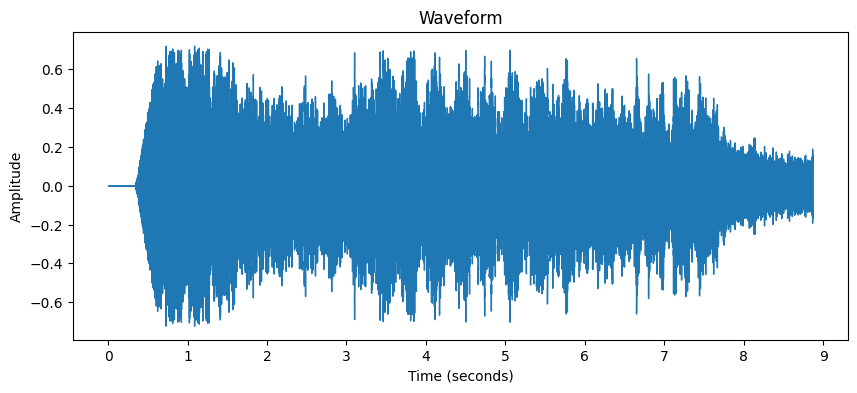

In [5]:
import matplotlib.pyplot as plt

# Plotting the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


In [9]:
import numpy as np


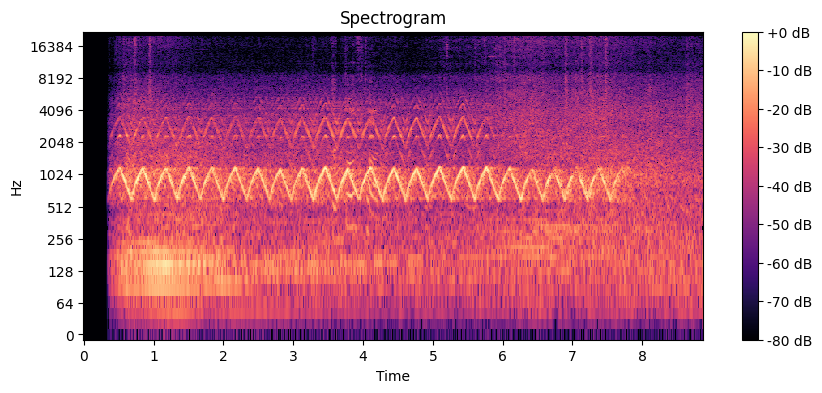

In [10]:
# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plotting the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


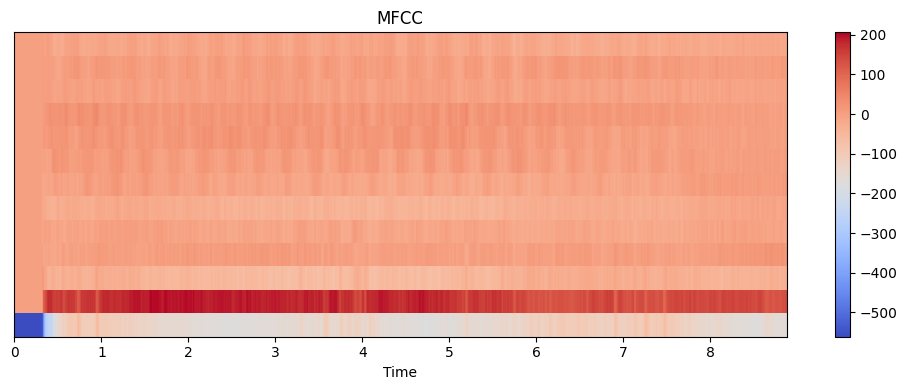

In [11]:
# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plotting the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


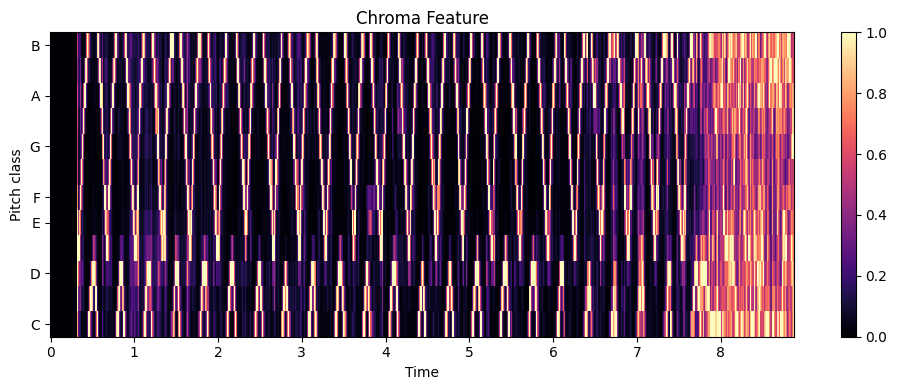

In [12]:
# Compute the chroma feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plotting the chroma feature
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()


In [13]:
from IPython.display import Audio

Audio(audio_path)


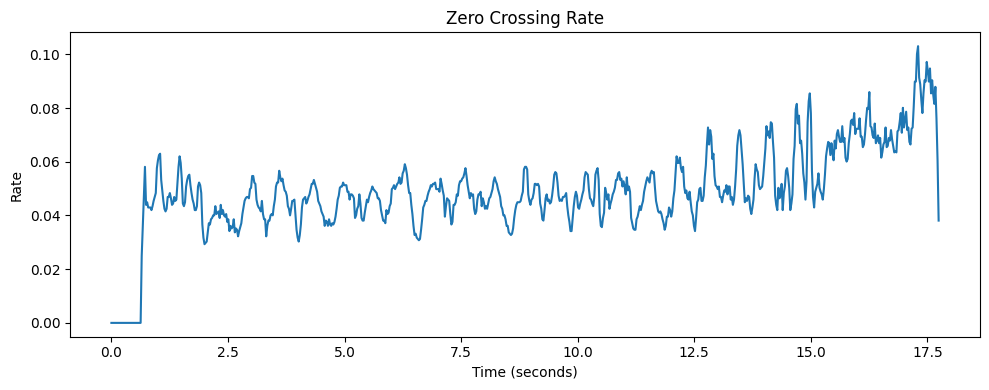

In [14]:
# Compute zero crossing rate
zcr = librosa.feature.zero_crossing_rate(y)[0]

# Plotting zero crossing rate
plt.figure(figsize=(10, 4))
plt.plot(librosa.times_like(zcr), zcr, label='Zero Crossing Rate')
plt.title('Zero Crossing Rate')
plt.xlabel('Time (seconds)')
plt.ylabel('Rate')
plt.tight_layout()
plt.show()


**Clustering -**

In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [16]:
# Load the audio file
audio_path = '/content/ambulance_audio.wav'  # Adjust the path based on where you upload it in Colab
y, sr = librosa.load(audio_path, sr=None)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)


In [17]:
# Standardize the data
scaler = StandardScaler()
scaled_mfccs = scaler.fit_transform(mfccs.T)

# K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_mfccs)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Determine the number of samples per frame
hop_length = 512  # default hop length in librosa for mfcc
label_expanded = np.repeat(labels, hop_length)

# Trim the expanded labels array to match the size of the audio signal
label_expanded = label_expanded[:len(y)]


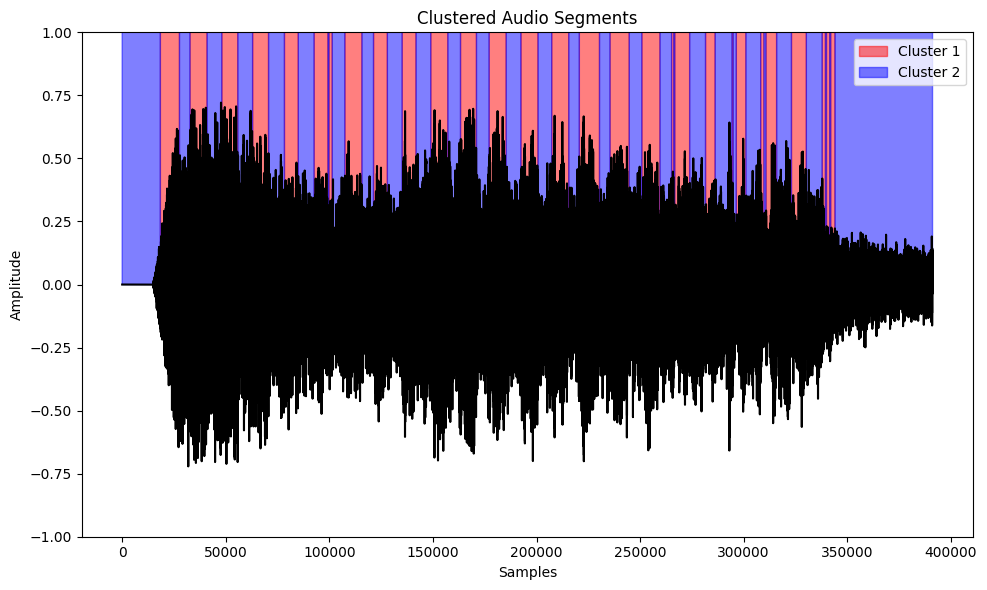

In [21]:
# Create a color map for visualization
colors = ['r', 'b']

# Plot the waveform with clustered segments
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.fill_between(range(len(y)), 0, 1, where=(label_expanded == i), color=colors[i], alpha=0.5, label=f'Cluster {i+1}')
plt.plot(y, color='k')
plt.ylim([-1, 1])
plt.title('Clustered Audio Segments')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


**Model -**

In [22]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 32.9 MB/s et

In [23]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame(scaled_mfccs)
df['label'] = labels


In [24]:
from pycaret.classification import *

# Initialize the environment
clf1 = setup(df, target = 'label')


,Description,Value
0,Session id,3184
1,Target,label
2,Target type,Binary
3,Original data shape,"(765, 14)"
4,Transformed data shape,"(765, 14)"
5,Transformed train set shape,"(535, 14)"
6,Transformed test set shape,"(230, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [25]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9963,1.0000,0.9967,0.9968,0.9967,0.9925,0.9926,1.6040
svm,SVM - Linear Kernel,0.9776,0.0000,0.9795,0.9799,0.9794,0.9547,0.9555,0.0400
ridge,Ridge Classifier,0.9719,0.0000,0.9632,0.9867,0.9737,0.9437,0.9463,0.0530
lda,Linear Discriminant Analysis,0.9719,0.9982,0.9632,0.9867,0.9737,0.9437,0.9463,0.0600
et,Extra Trees Classifier,0.9719,0.9968,0.9695,0.9796,0.9744,0.9432,0.9436,0.4540
nb,Naive Bayes,0.9664,0.9953,0.9663,0.9736,0.9696,0.9320,0.9328,0.0640
knn,K Neighbors Classifier,0.9645,0.9921,0.9632,0.9734,0.9678,0.9282,0.9294,0.0720
lightgbm,Light Gradient Boosting Machine,0.9625,0.9939,0.9529,0.9789,0.9655,0.9246,0.9254,0.5060
xgboost,Extreme Gradient Boosting,0.9607,0.9944,0.9597,0.9703,0.9641,0.9206,0.9223,0.2410
ada,Ada Boost Classifier,0.9589,0.9909,0.9563,0.9697,0.9625,0.9170,0.9180,0.5740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3184, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.9375,1.0000,0.9091,0.9524,0.8861,0.8919
1,0.9444,0.9458,0.9333,0.9655,0.9492,0.8880,0.8886
2,0.9444,0.9458,0.9333,0.9655,0.9492,0.8880,0.8886
3,0.8889,0.8958,0.8333,0.9615,0.8929,0.7787,0.7873
4,0.8889,0.8958,0.8333,0.9615,0.8929,0.7787,0.7873
5,0.9057,0.8964,0.9667,0.8788,0.9206,0.8050,0.8106
6,0.9623,0.9616,0.9667,0.9667,0.9667,0.9232,0.9232
7,0.9057,0.9030,0.9310,0.9000,0.9153,0.8089,0.8095
8,0.8679,0.8614,0.9310,0.8438,0.8852,0.7306,0.7355


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
final_dt = finalize_model(dt)
save_model(final_dt, 'final_dt_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Transfo...
                                                            